In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# 设置随机数种子，使运行结果可复现
np.random.seed(2046)

In [2]:
# 生成样例数据
d1 = np.random.normal(5, 5, 10)
d2 = np.random.normal(5, 5, 10)
groups = ['d1'] * 10 + ['d2'] * 10
d = {'A': np.concatenate((d1, d2)), 'B': groups}
data = pd.DataFrame(d)
data

,A,B
0,6.075330,d1
1,9.420834,d1
2,-0.804424,d1
3,3.921919,d1
4,10.804938,d1
5,-2.600408,d1
6,4.819779,d1
7,-0.720696,d1
8,5.434779,d1
9,1.964238,d1


           A
B           
d1  3.831629
d2  1.545944


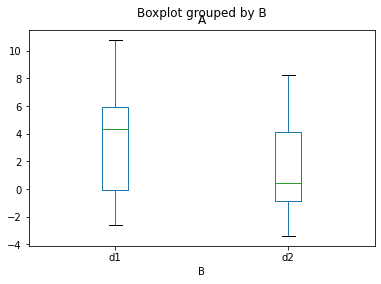

In [3]:
print(data.groupby('B').mean())
data.boxplot('A', by='B', grid=False)
plt.show()

In [4]:
# 计算定量特征A与定性特征B之间的eta squared
re = sm.OLS.from_formula('A ~ B', data=data).fit()
aov_table = sm.stats.anova_lm(re, typ=2)
# 打印ANOVA分析结果
print(aov_table)

              sum_sq    df         F    PR(>F)
B          26.121773   1.0  1.549558  0.229165
Residual  303.436158  18.0       NaN       NaN


In [5]:
# 计算eta sqaured，根据ANOVA，两者数据并没有显著不同，这与事实相符
eta_squared = aov_table['sum_sq'][0] / (aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
eta_squared

0.07926306841913713